In [6]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50 )
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white") #white, darkgrid , whitegrid , dark , ticks

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from tqdm import tqdm_notebook as tqdm

import warnings
warnings.simplefilter('ignore')

## EDA

#### correlation matrix of musical components

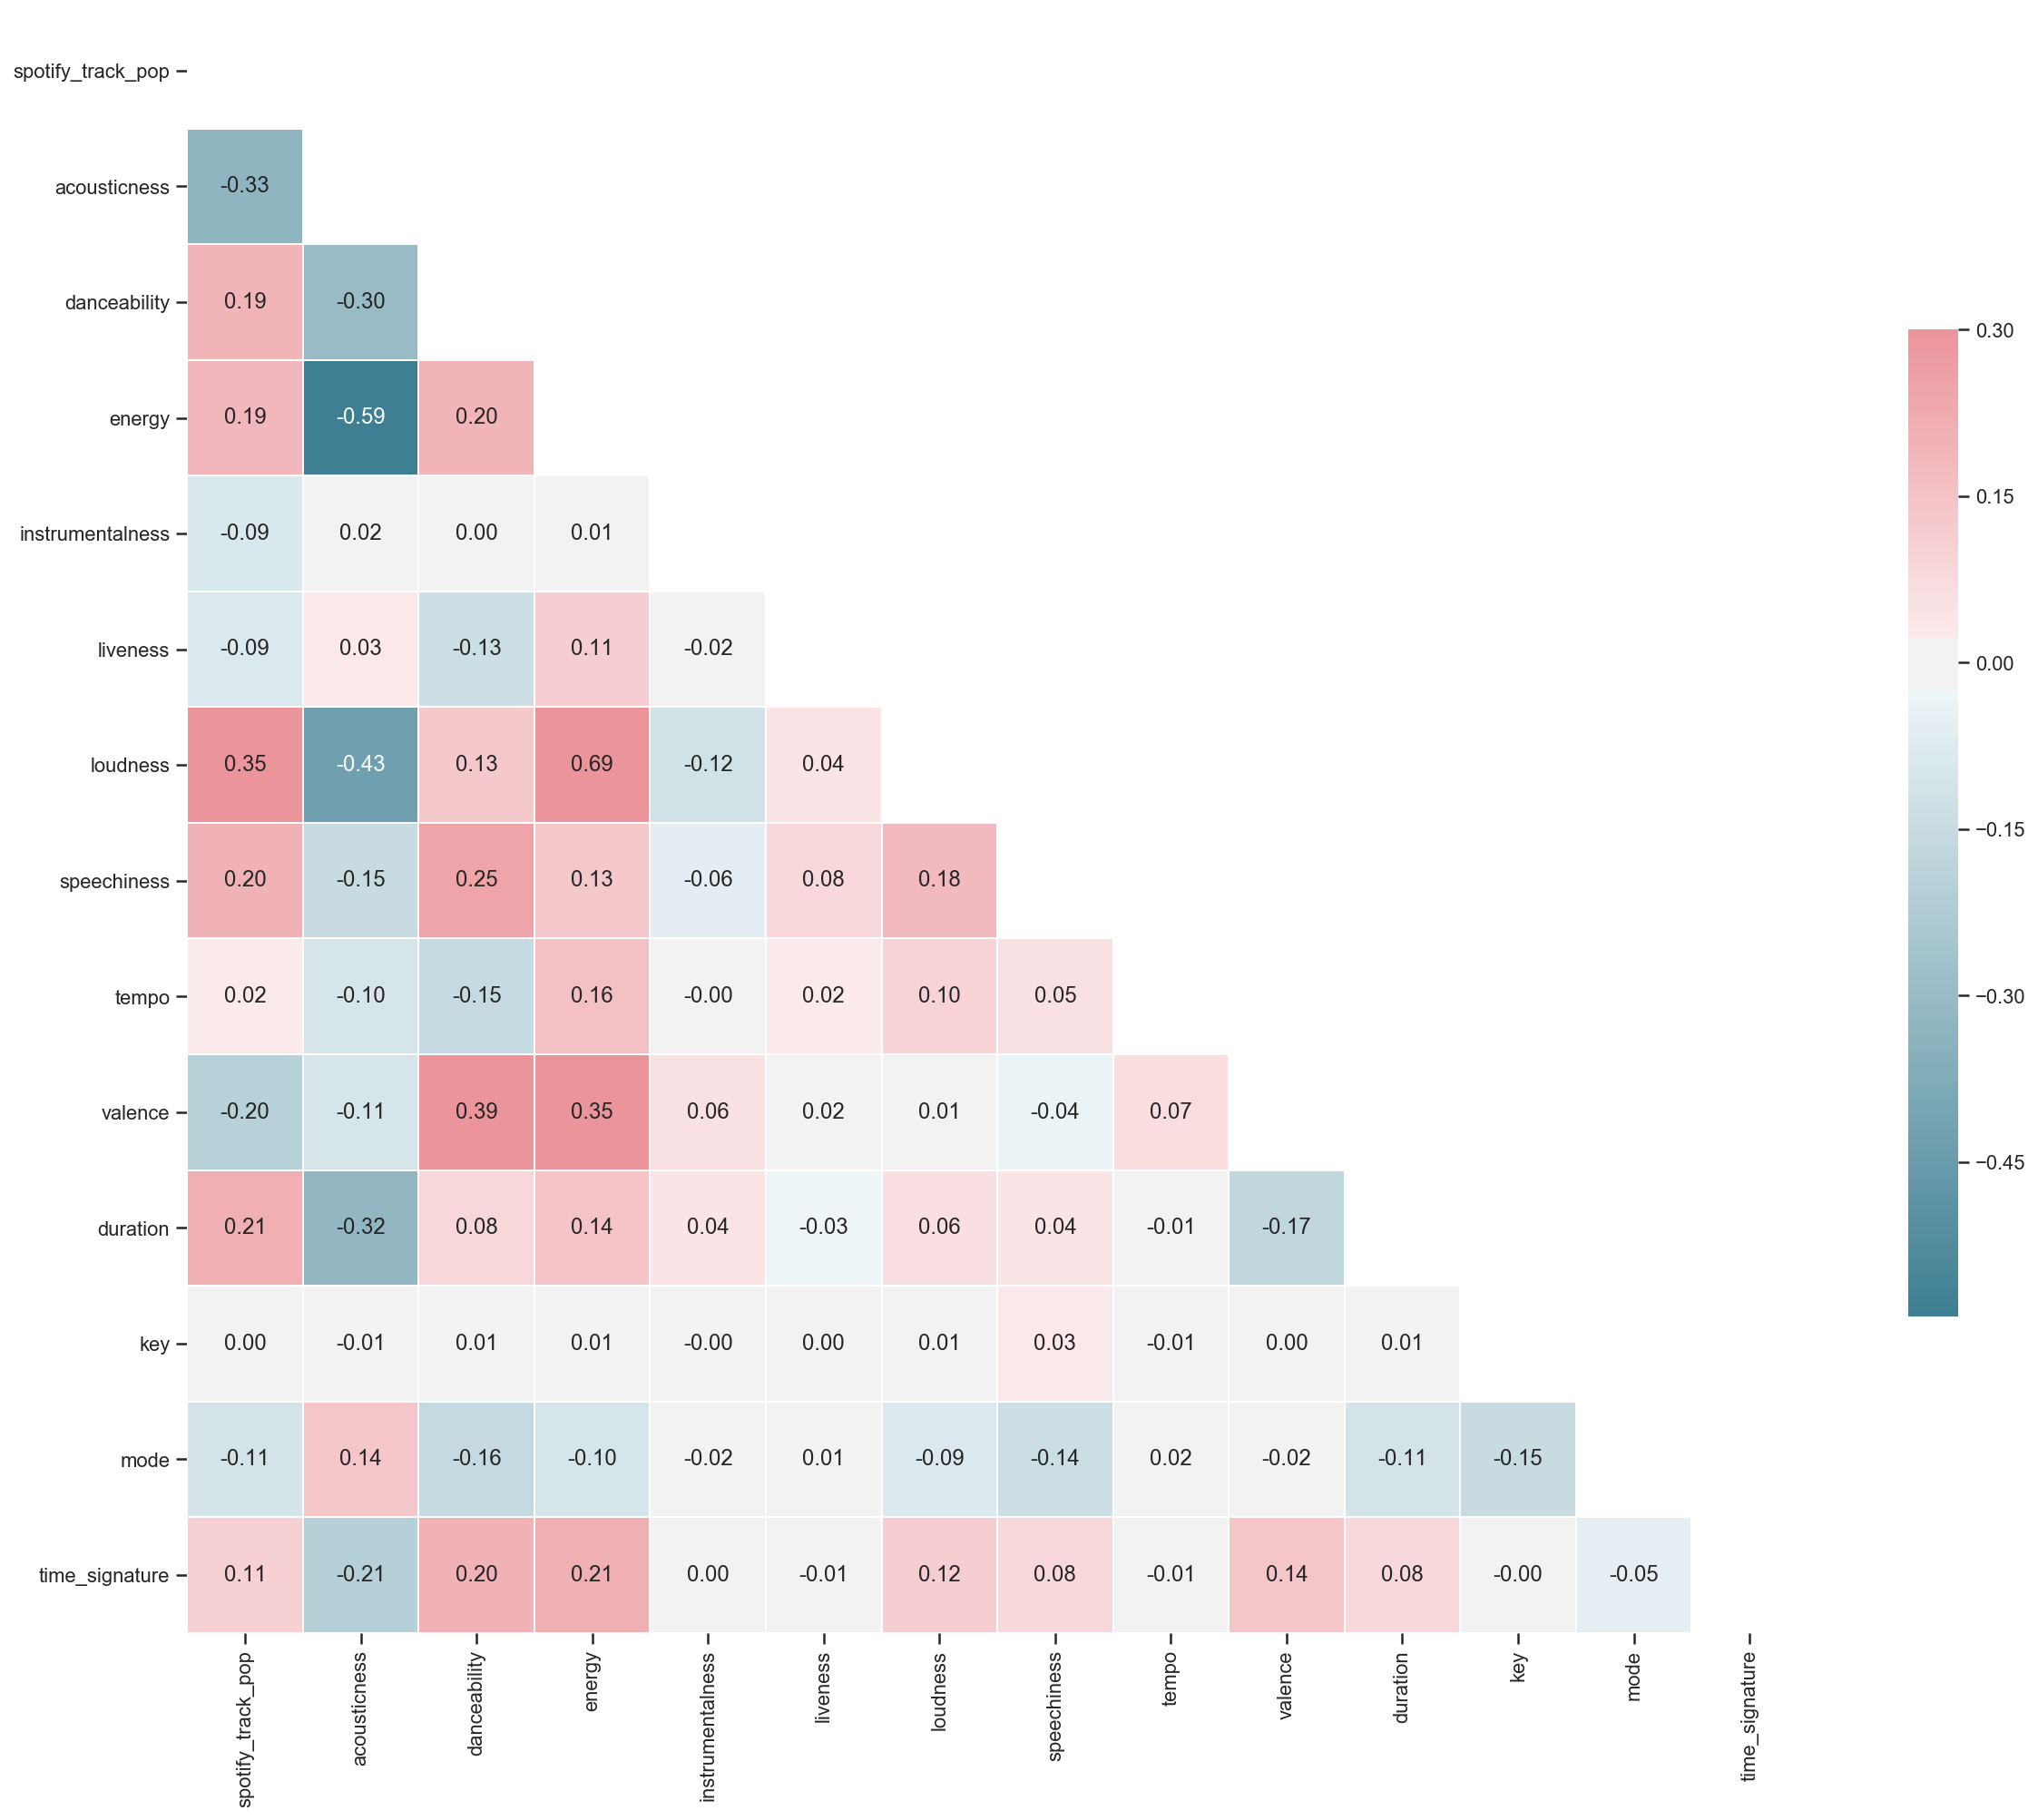

In [85]:
musical_components = just_one.drop(['artist', 'track_name', 'genre', 'spot_artist_popularity','spot_followers', 'weekid', 'track_longevity',
               'artist_familiarity', 'peak_rank', 'time'], axis=1)
corr = musical_components.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f'  ); 
plt.ylim([len(corr), 0]); 
			

#### correlation matrix of engineered features

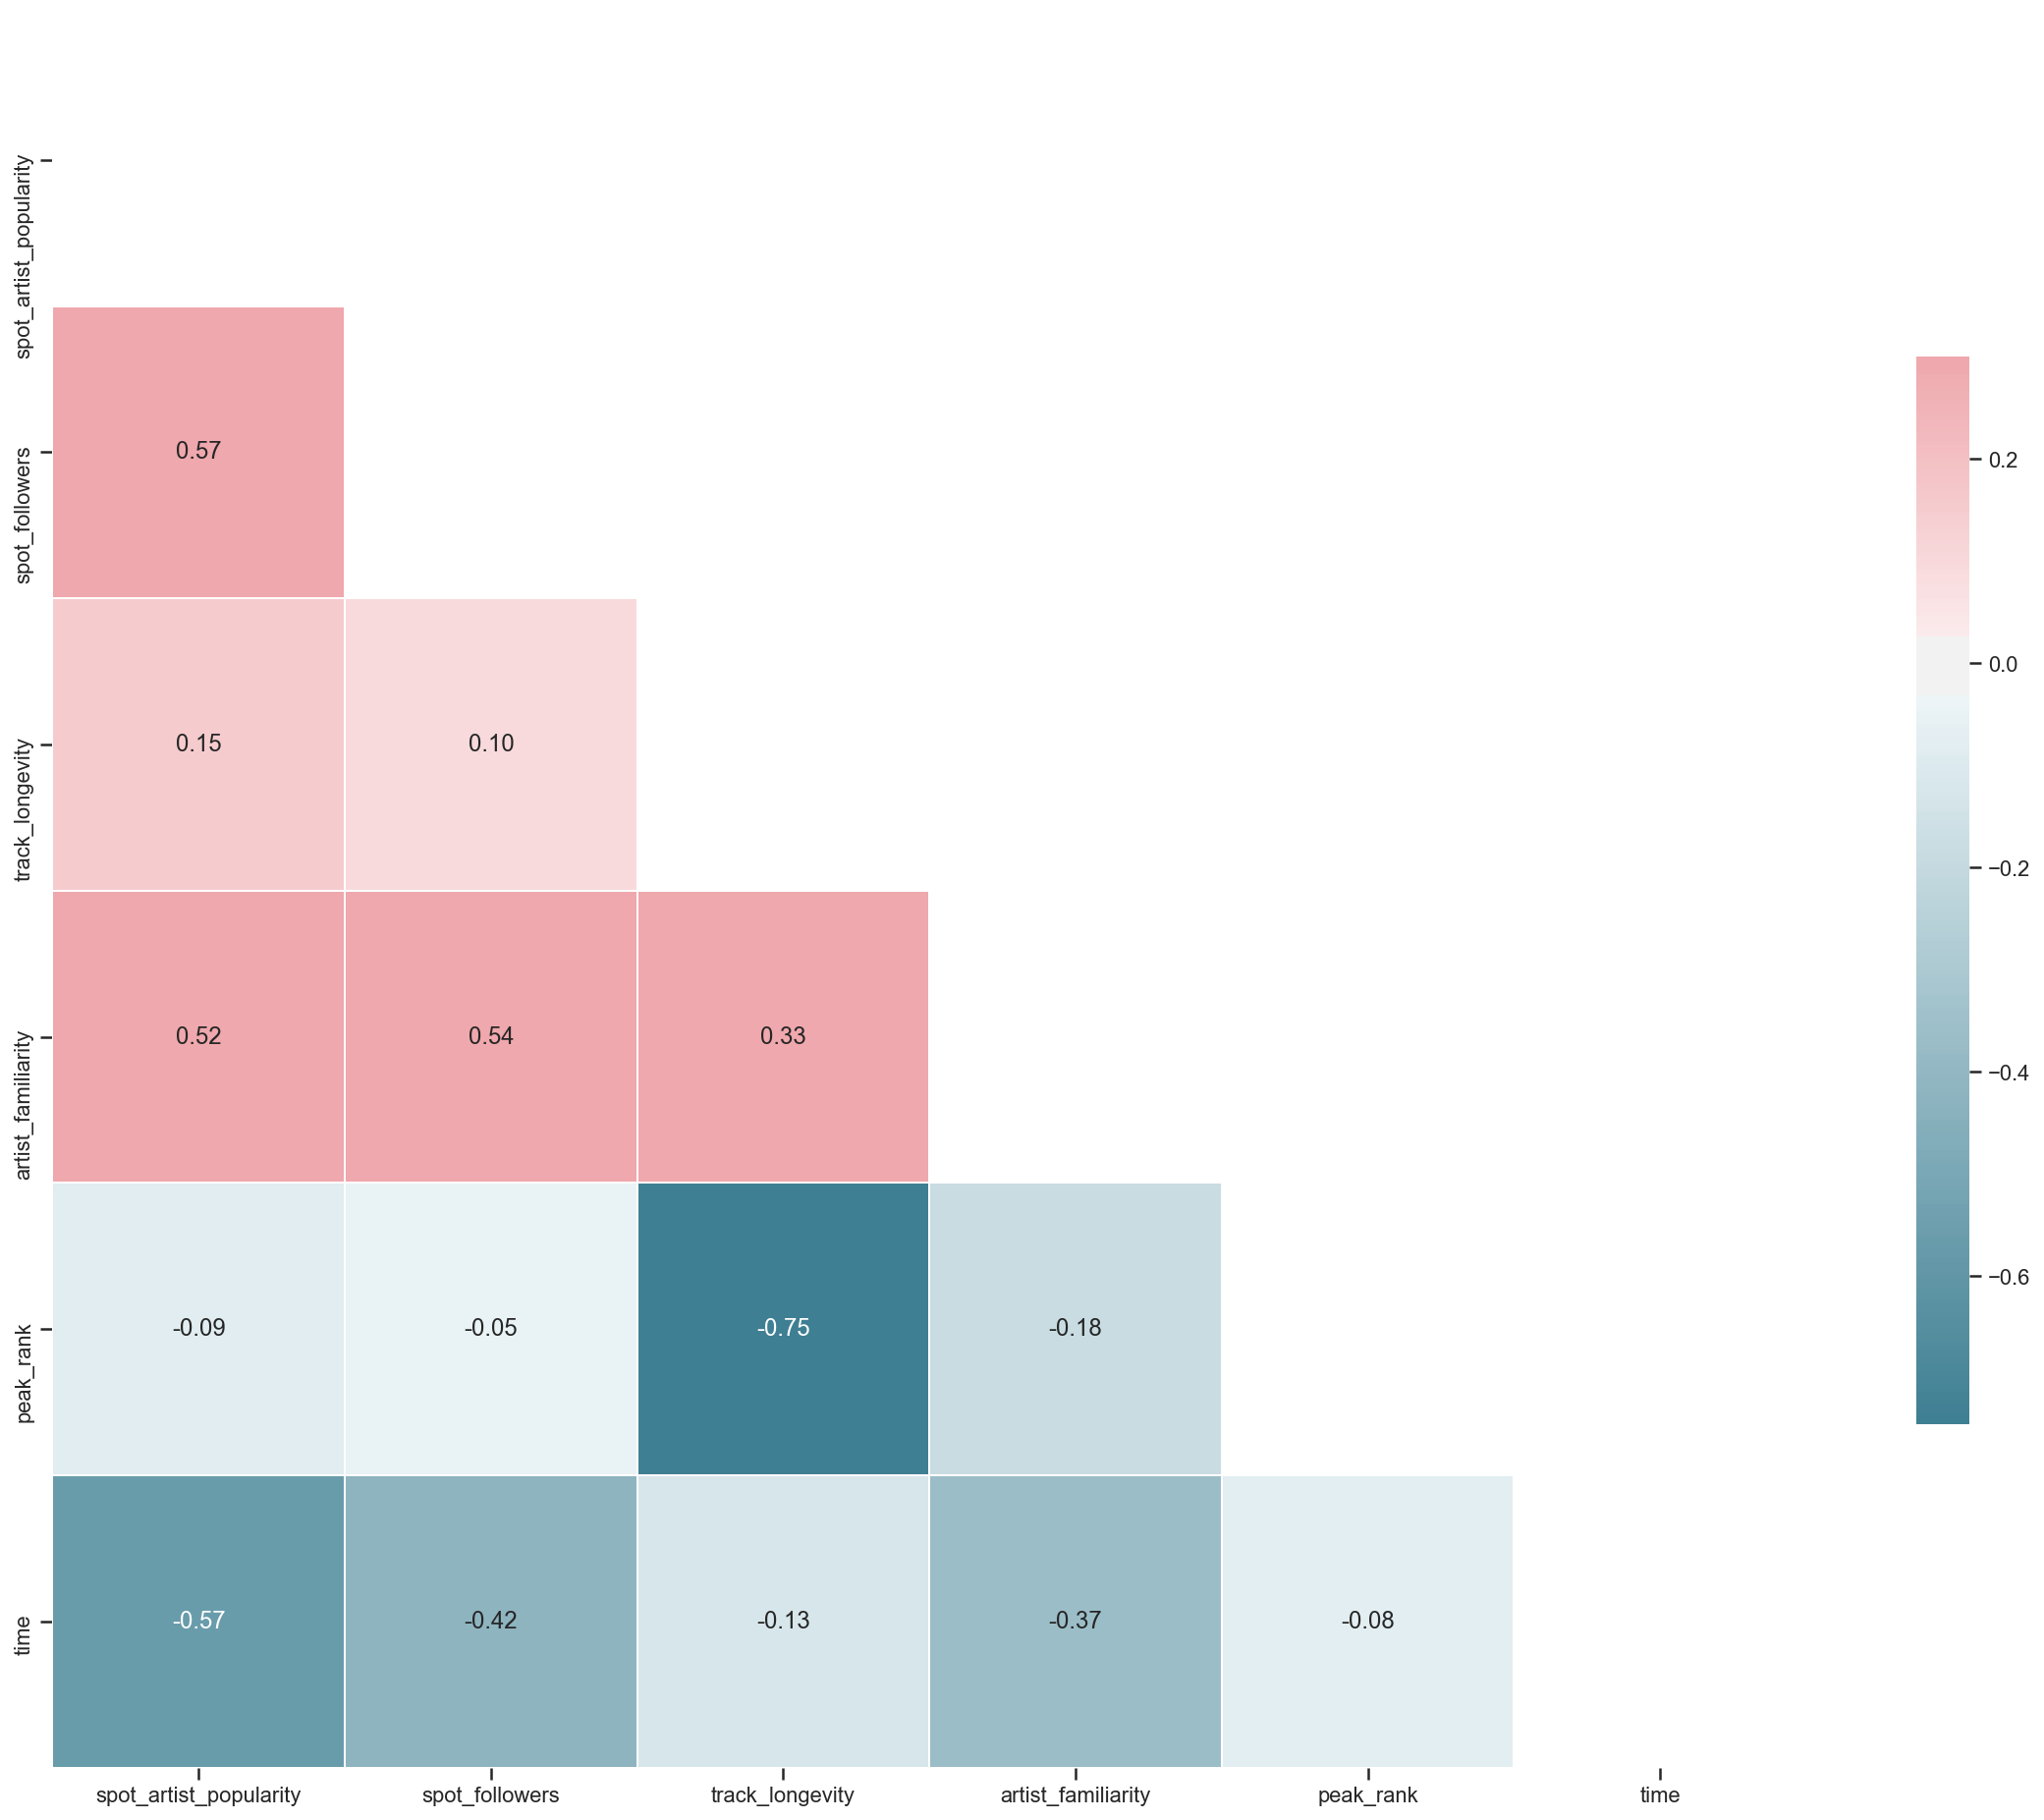

In [88]:
main_predictors = just_one[['artist', 'track_name', 'genre', 'spot_artist_popularity','spot_followers', 'weekid', 'track_longevity',
               'artist_familiarity', 'peak_rank', 'time']]
corr = main_predictors.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f'  ); 
plt.ylim([len(corr), 0]); 
			

## initial descriptive 

In [1252]:
df.describe()

spotify_track_pop  spot_artist_popularity  spot_followers  \
count      215408.000000           215408.000000    2.154080e+05   
mean           49.859685               66.435467    2.992045e+06   
std            19.675132               15.915061    6.374064e+06   
min             0.000000                3.000000    2.300000e+01   
25%            37.000000               56.000000    1.662580e+05   
50%            53.000000               68.000000    6.959740e+05   
75%            65.000000               77.000000    2.660638e+06   
max            95.000000              100.000000    5.460589e+07   

               month           year          rank_  weeks_on_chart  \
count  215408.000000  215408.000000  215408.000000   215408.000000   
mean        6.541605    1991.141025      48.432769        9.623347   
std         3.460537      17.579487      28.634740        7.773706   
min         1.000000    1958.000000       1.000000        1.000000   
25%         4.000000    1976.000000      24.000000        4.000000   
50%         7.000000    1992.000000      47.000000        8.000000   
75%        10.000000    2007.000000      73.000000       13.000000   
max        12.000000    2019.000000     100.000000       87.000000   

            instance   acousticness   danceability         energy  \
count  215408.000000  215408.000000  215408.000000  215408.000000   
mean        1.071483       0.251297       0.611151       0.636666   
std         0.318951       0.260975       0.148557       0.193782   
min         1.000000       0.000008       0.000000       0.020400   
25%         1.000000       0.035900       0.515000       0.498000   
50%         1.000000       0.148000       0.620000       0.657000   
75%         1.000000       0.411000       0.716000       0.792000   
max         8.000000       0.991000       0.988000       0.997000   

       instrumentalness       liveness       loudness    speechiness  \
count     215408.000000  215408.000000  215408.000000  215408.000000   
mean           0.021238       0.186302      -8.224550       0.070641   
std            0.103822       0.155785       3.546417       0.078220   
min            0.000000       0.009670     -28.030000       0.000000   
25%            0.000000       0.088400     -10.511000       0.031900   
50%            0.000004       0.127000      -7.583000       0.040800   
75%            0.000307       0.241000      -5.477000       0.066000   
max            0.965000       0.997000      -0.463000       0.950000   

               tempo        valence      duration            key  \
count  215408.000000  215408.000000  2.154080e+05  215408.000000   
mean      120.286774       0.594136  2.311680e+05       5.243946   
std        27.713215       0.236492  6.088661e+04       3.552029   
min         0.000000       0.000000  6.990700e+04       0.000000   
25%        99.560000       0.407000  1.935600e+05       2.000000   
50%       118.823000       0.611000  2.272670e+05       5.000000   
75%       136.155000       0.790000  2.606000e+05       8.000000   
max       217.396000       0.989000  1.367093e+06      11.000000   

                mode  time_signature  
count  215408.000000   215408.000000  
mean        0.719620        3.951144  
std         0.449186        0.279734  
min         0.000000        0.000000  
25%         0.000000        4.000000  
50%         1.000000        4.000000  
75%         1.000000        4.000000  
max         1.000000        5.000000

In [1253]:
df.spot_followers.max()

54605886.0

# -----------------------------------------------------------------------------------------

## visual analysis 

## musical features

#### distribution of musical features

In [69]:
musical = just_one[['acousticness', 'danceability',
                'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
                'tempo', 'valence', 'genre']]

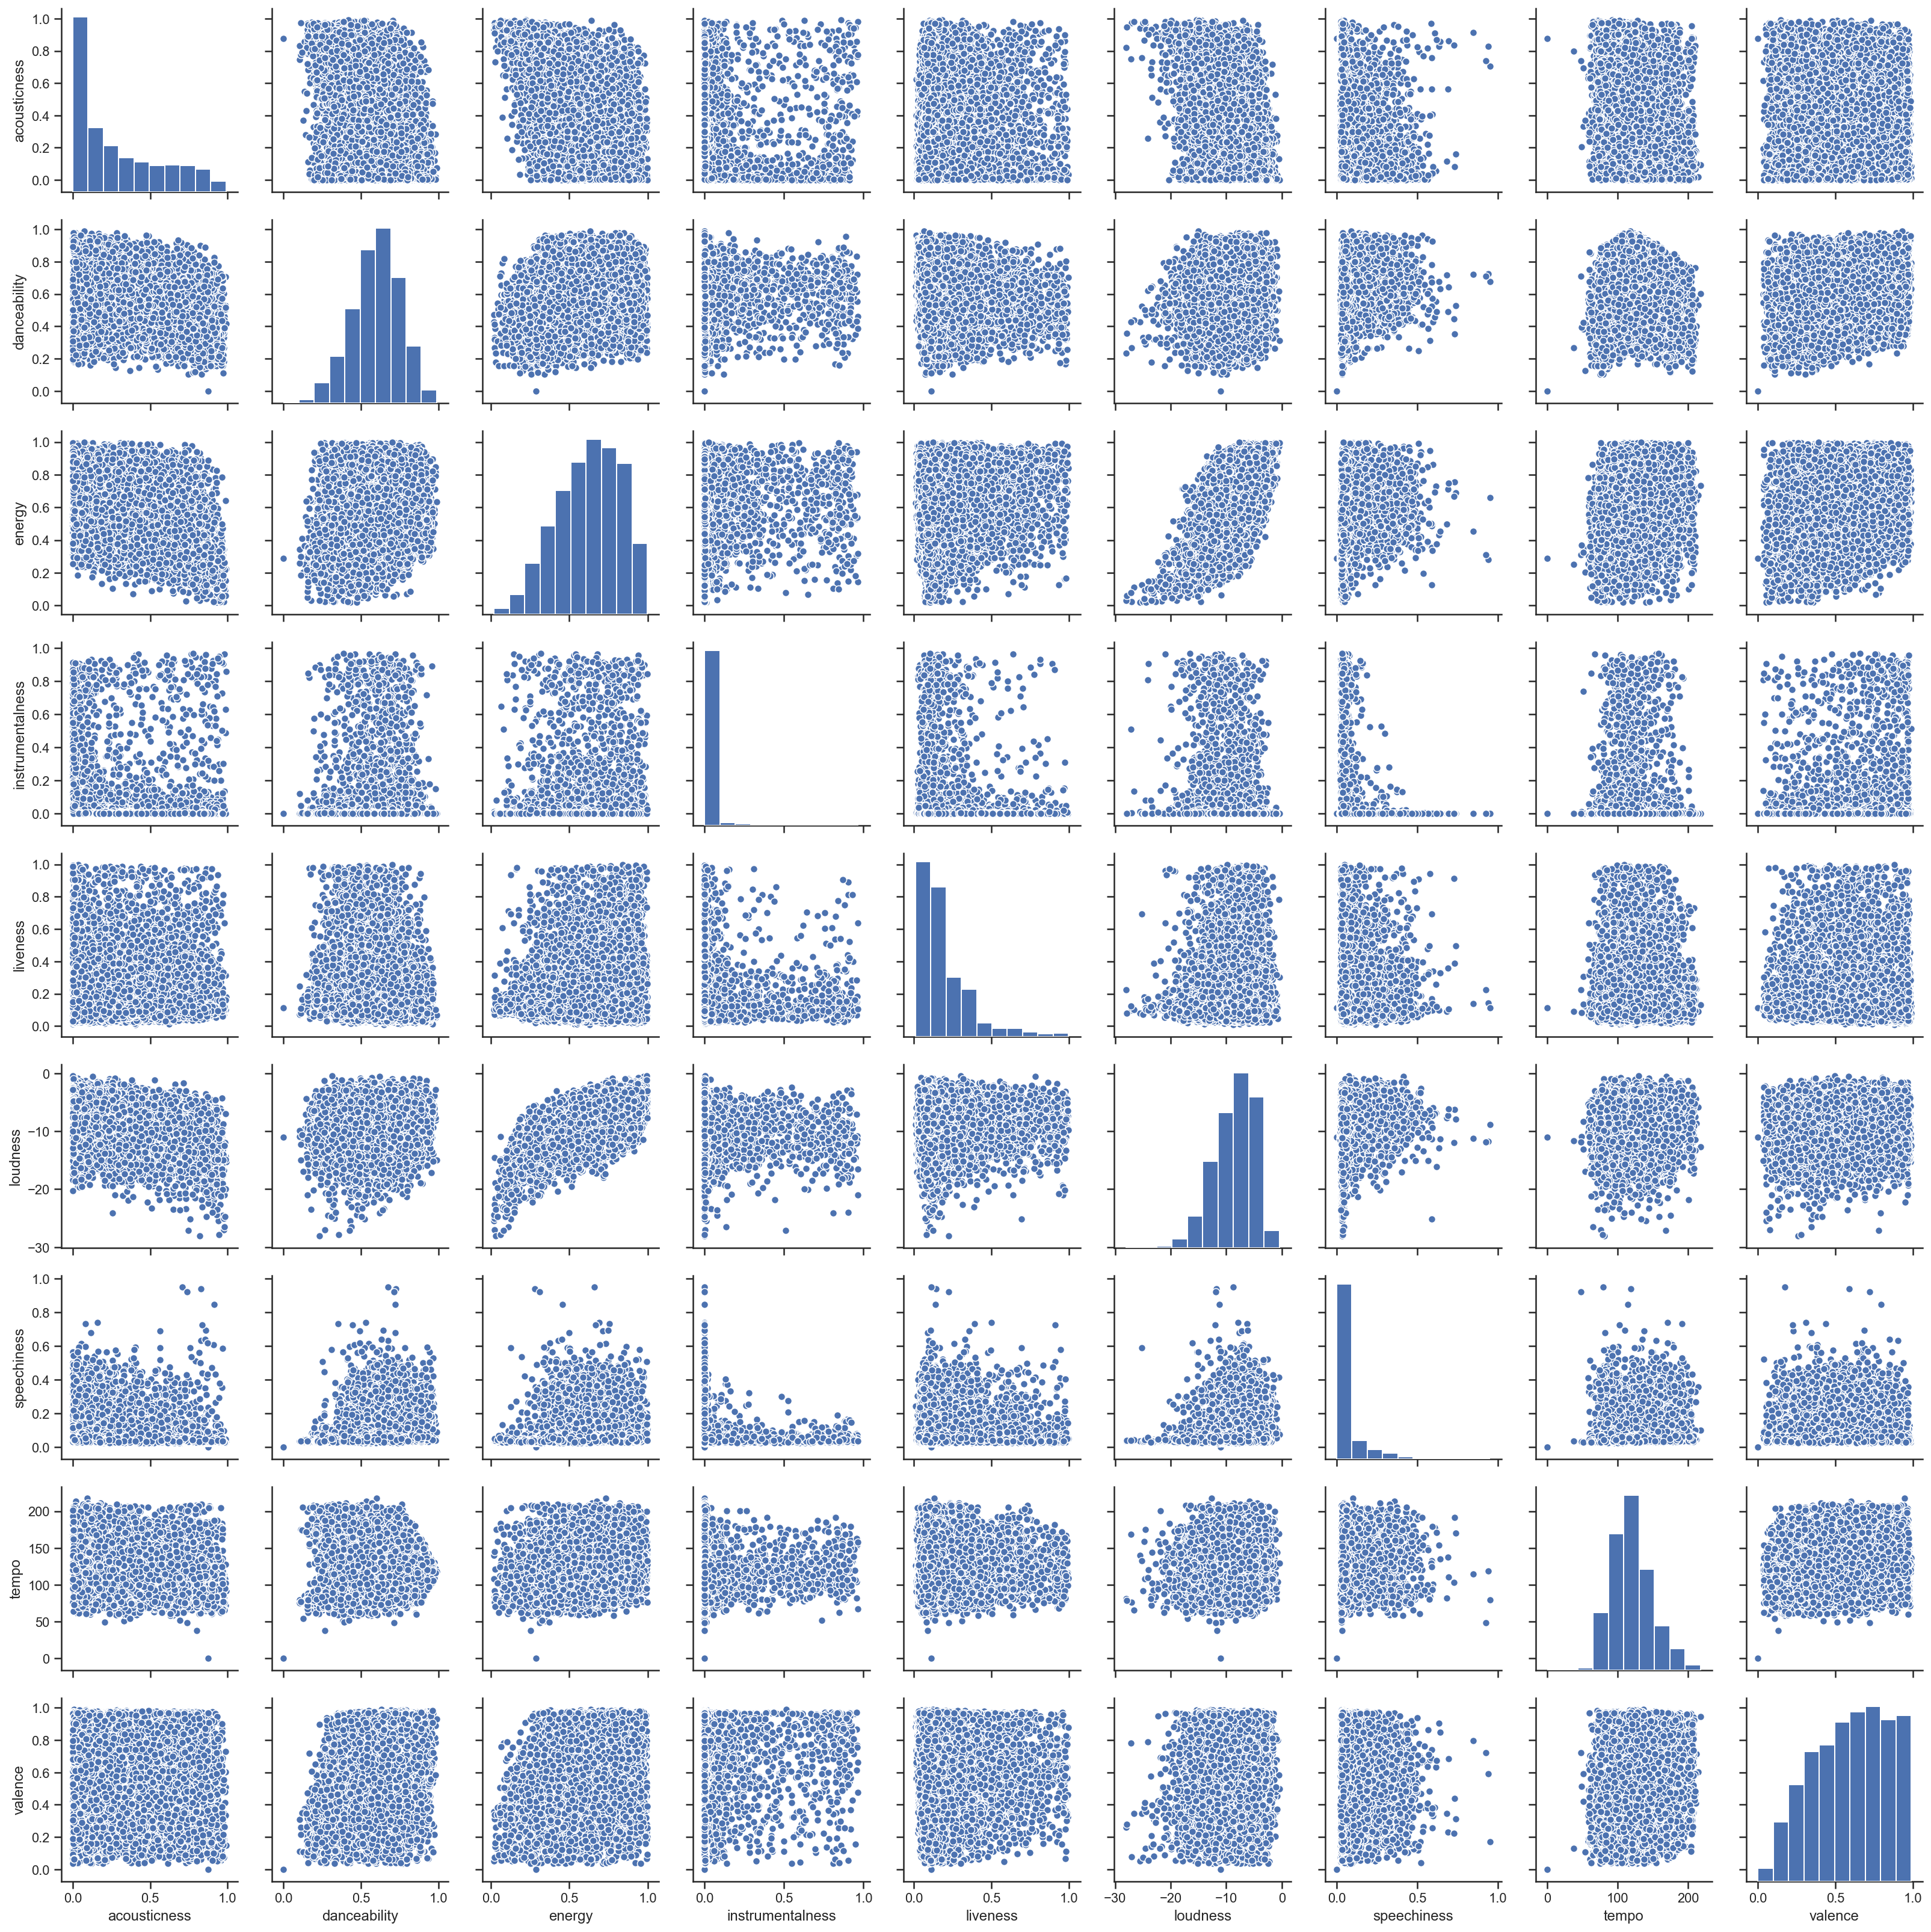

In [70]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(musical, vars=['acousticness', 'danceability', 'energy', 'instrumentalness',
                            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']) 
#  palette="husl"

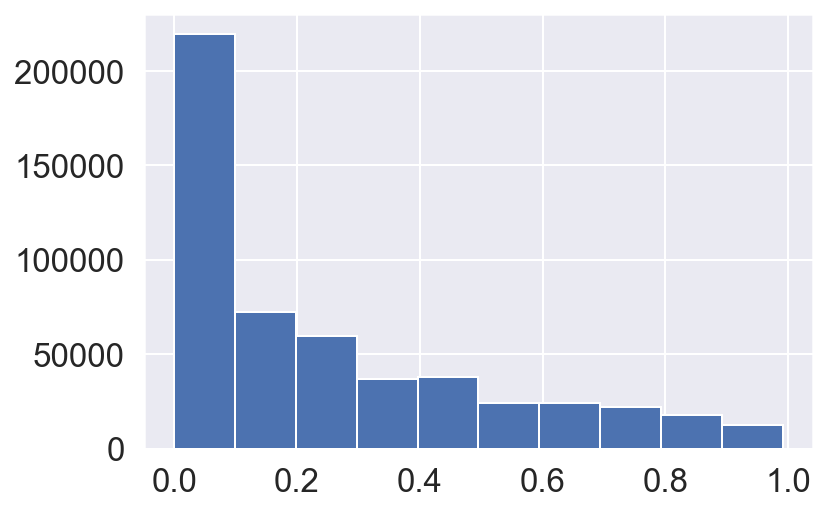

In [869]:
df.acousticness.hist();

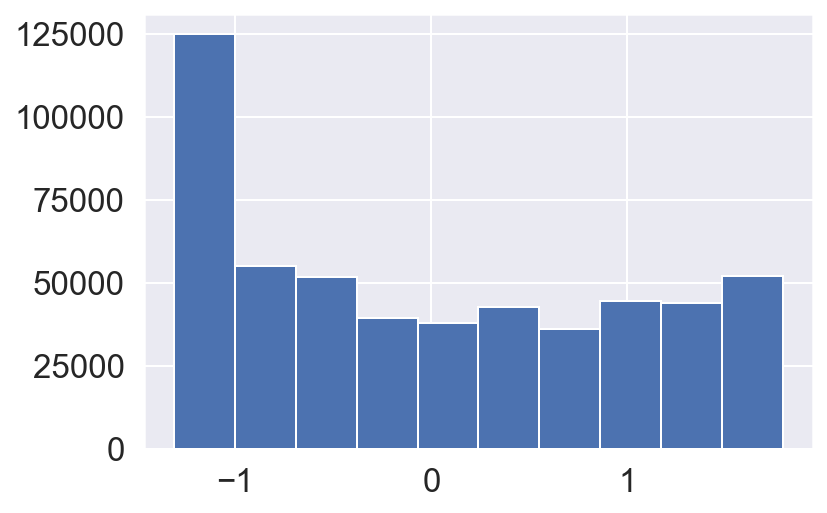

In [876]:
power.acousticness.hist();

In [844]:
new_thing = df[['instrumentalness', 'speechiness', 'acousticness']]

In [875]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
power = pd.DataFrame(pt.fit_transform(new_thing), columns=['instrumentalness', 'speechiness', 'acousticness'])
power.head()

instrumentalness  speechiness  acousticness
0         -0.387864    -0.720206     -1.242604
1         -0.387864    -0.720206     -1.242604
2         -0.387864    -0.720206     -1.242604
3         -0.387864    -0.720206     -1.242604
4         -0.387864    -0.720206     -1.242604

In [56]:
# none are mostly normally distributed except danceability and tempo, so i power transformed them

### annual trends in musical components 

In [56]:
plt.style.use('seaborn-white')
#seaborn-white
#fivethirtyeight

In [ ]:
timeseries = musical.join(df.weekid)
timeseries.weekid = pd.to_datetime(timeseries.weekid)
timeseries.weekid.sort_values(ascending=True)
timeseries.set_index("weekid", inplace = True, drop=True) 
timeseries.index.name = None

I graphed the (rolling) median/means for each parameter to look for some trends. I took annual median values, which I realize leaves out fuzzier and richer weekly information, but I felt yearly averages were good enough for looking at broad diachronic spans. I might go back and see if there are any seasonal/monthly ebbs/flows to any of these parameters.

#### 0 to 1

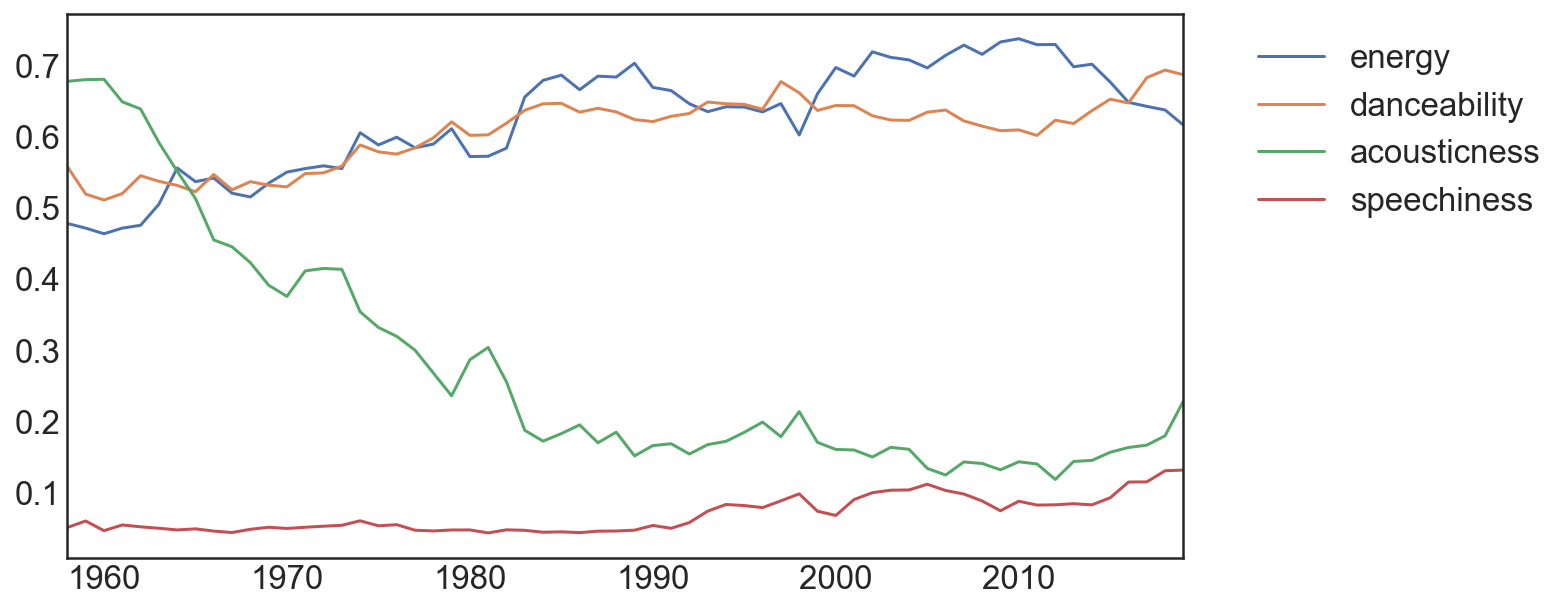

In [47]:
fig= plt.figure(figsize=(10,5))
timeseries.energy.resample('A').mean().plot()
timeseries.danceability.resample('A').mean().plot()
timeseries.acousticness.resample('A').mean().plot()
#timeseries.liveness.resample('A').mean().plot()
timeseries.speechiness.resample('A').mean().plot()
#timeseries.instrumentalness.resample('A').mean().plot()

plt.legend(['energy', 'danceability', 'acousticness', 'speechiness'],bbox_to_anchor=(1.04,1), loc="upper left");
# 'liveness', 'instrumentalness'

In [ ]:
# do rolling mean for each genre for each component

#### danceability & energy

Danceability is a quantitative measurement about a qualitative feeling computed by Spotify according to several factors. They look at tempo, rhythm stability, beat strength and overall regularity to get a number for how suitable the song is for dancing. It’s not surprising that Hip-Hop and Pop tend higher on this scale. Their songs tend to be composed in 4/4 and stay within this time signature (a measurement how many beats are within a measure). Metal tracks on the other-hand are more likely to explore complex polyrhythms, syncopation and changing time signatures. Another interesting insight from this is how narrow the range is for the Latin tracks which are all generally very danceable which is indicative of the focus on music for dancing culturally.


 Energy is a measurement from Spotify that tries to encapsulate the intensity and activity within a track. While all of the genres generally have a high level of energy with some outliers on the lower scale there is no competing with the driving rhythms and distorted tones of Metal. Even the outlier tracks are all above the baseline measurement of energy. The distribution is highly skewed with over half of the tracks on the extreme end of the spectrum.

#### speechiness & acousticness

With the rise of hip hop in the ’90s and ’00s, popular music exhibits more “speechiness” than it had before  

increased roles of electronic instruments/ music production sofware have led to a steady decline in “acousticness”.

#### valence 

Valence is one of the more interesting features Spotify provides for a track. Their definition of valence is a measure describing the musical positiveness of a track with 0 tending to be a very negative song (e.g sad, depressed, angry) and 1 tending to be a very positive song (e.g happy, cheerful, euphoric). The genres all run the gamut in terms of valence but still there are distinctions between the genres. Pop songs are generally more positive than the other genres although they can also tend towards very negative. Metal in general is perceived as being angrier and this is definitely reflected in the data.


the average hot-100 song used to be much happier if we believe Spotify’s “valence” algorithms. 
Something like Barbra Streisand’s “The Main Event/Fight” (1979) embodies a roughly average “valence” (0.684) of the apparent happiest year in popular music, while “This Is What You Came For” (2016) by Calvin Harris Feat. Rihanna clocks in at about the average valence (0.465) for the saddest year.

#### liveness & instrumentalness

Another category where the differences are stark. Instrumentalness is a measurement of how likely a track is to not contain vocal elements. Though there are some clear outliers in Pop, the other genres clearly skew towards a heavy reliance on lyrical content and sung melodies. Groups or artists within these genres are usually focused around the singer and on supporting them in their melodies and providing harmony to their lines. Metal on the other hand is a genre that is largely focused around the band and all of its members of which the singer is just a small part. It is often more likely to be able to distinguish between drummers and guitarists of different groups in metal based on distinct styles than it would be to recognize a studio musician from a recording in Pop, Hip-Hop or Latin. Songs in Metal often have long periods with no vocals for the other musicians to expand upon the rhythms or motifs established in the verses, usually in longer technical solos which is evident in the data below.

#### different units: tempo & loudness

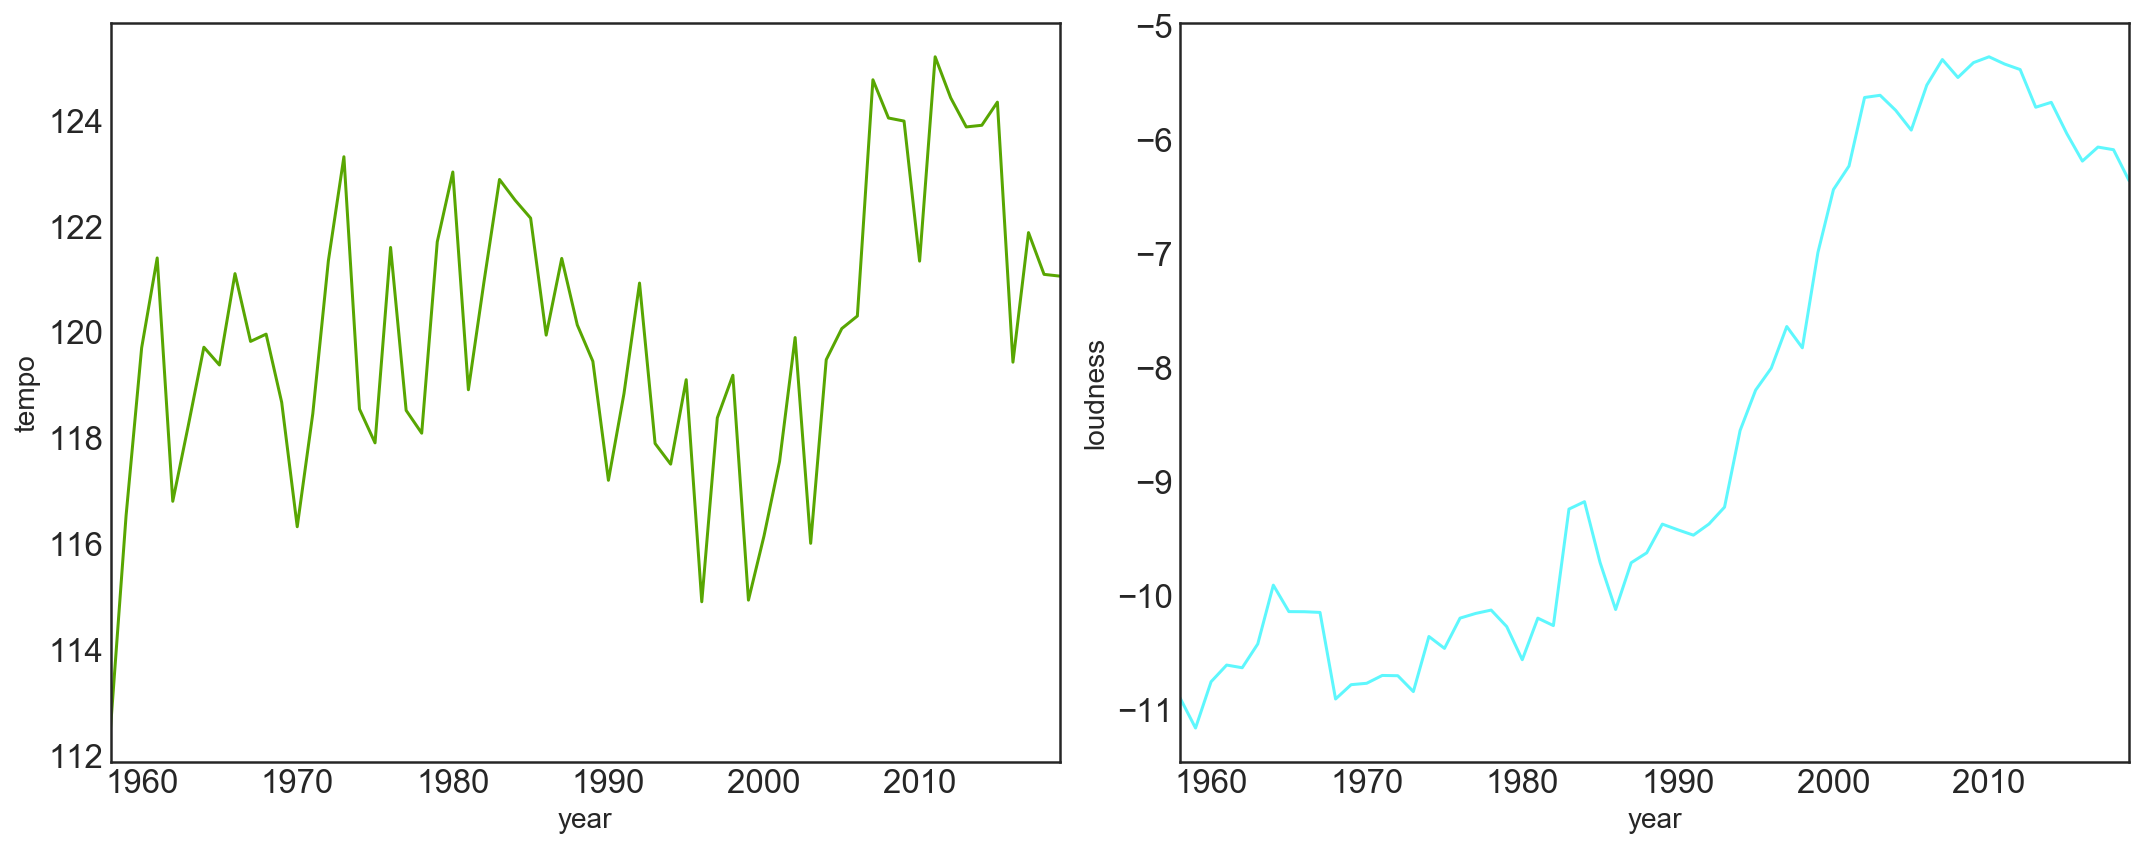

In [51]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6), sharex=False) 
timeseries.tempo.resample('A').mean().plot(ax=ax1, c=np.random.rand(3,));
timeseries.loudness.resample('A').mean().plot(ax=ax2, c=np.random.rand(3,));
ax1.set_xlabel('year', fontsize=14)
ax1.set_ylabel('tempo', fontsize=14)
ax2.set_xlabel('year', fontsize=14)
ax2.set_ylabel('loudness', fontsize=14)
plt.tight_layout()

#### tempo

The sharp decrease in tempo lines up with pop’s turn towards “chill” while perhaps hinting at an attenuation of the influence of the attention economy on the median hot-100 song. Spotify’s ecosystem in particular is geared towards creating soundtracks for everyday activities, meaning you probably don’t want a track to stick out too much or else it’ll get skipped. Or maybe late-00’s high-tempo EDM-infused pop started to seem an odd backdrop to the continuing economic uncertainty and division of the ’10s.

#### loudness

loudness has gone up

#### summary

Despite being ostensibly sadder, pop music has gotten more “danceable” and it only recently left a plateau of maximum “energy” 

# -----------------------------------------------------------------------------------------

## popularity

#### Distribtion of Current Popularity

In [ ]:
x="day", y="total_bill", hue="sex",
...                     data=tips, palette="Set2", split=True,
...                     scale="count", inner="stick",
...                     scale_hue=False, bw=.2

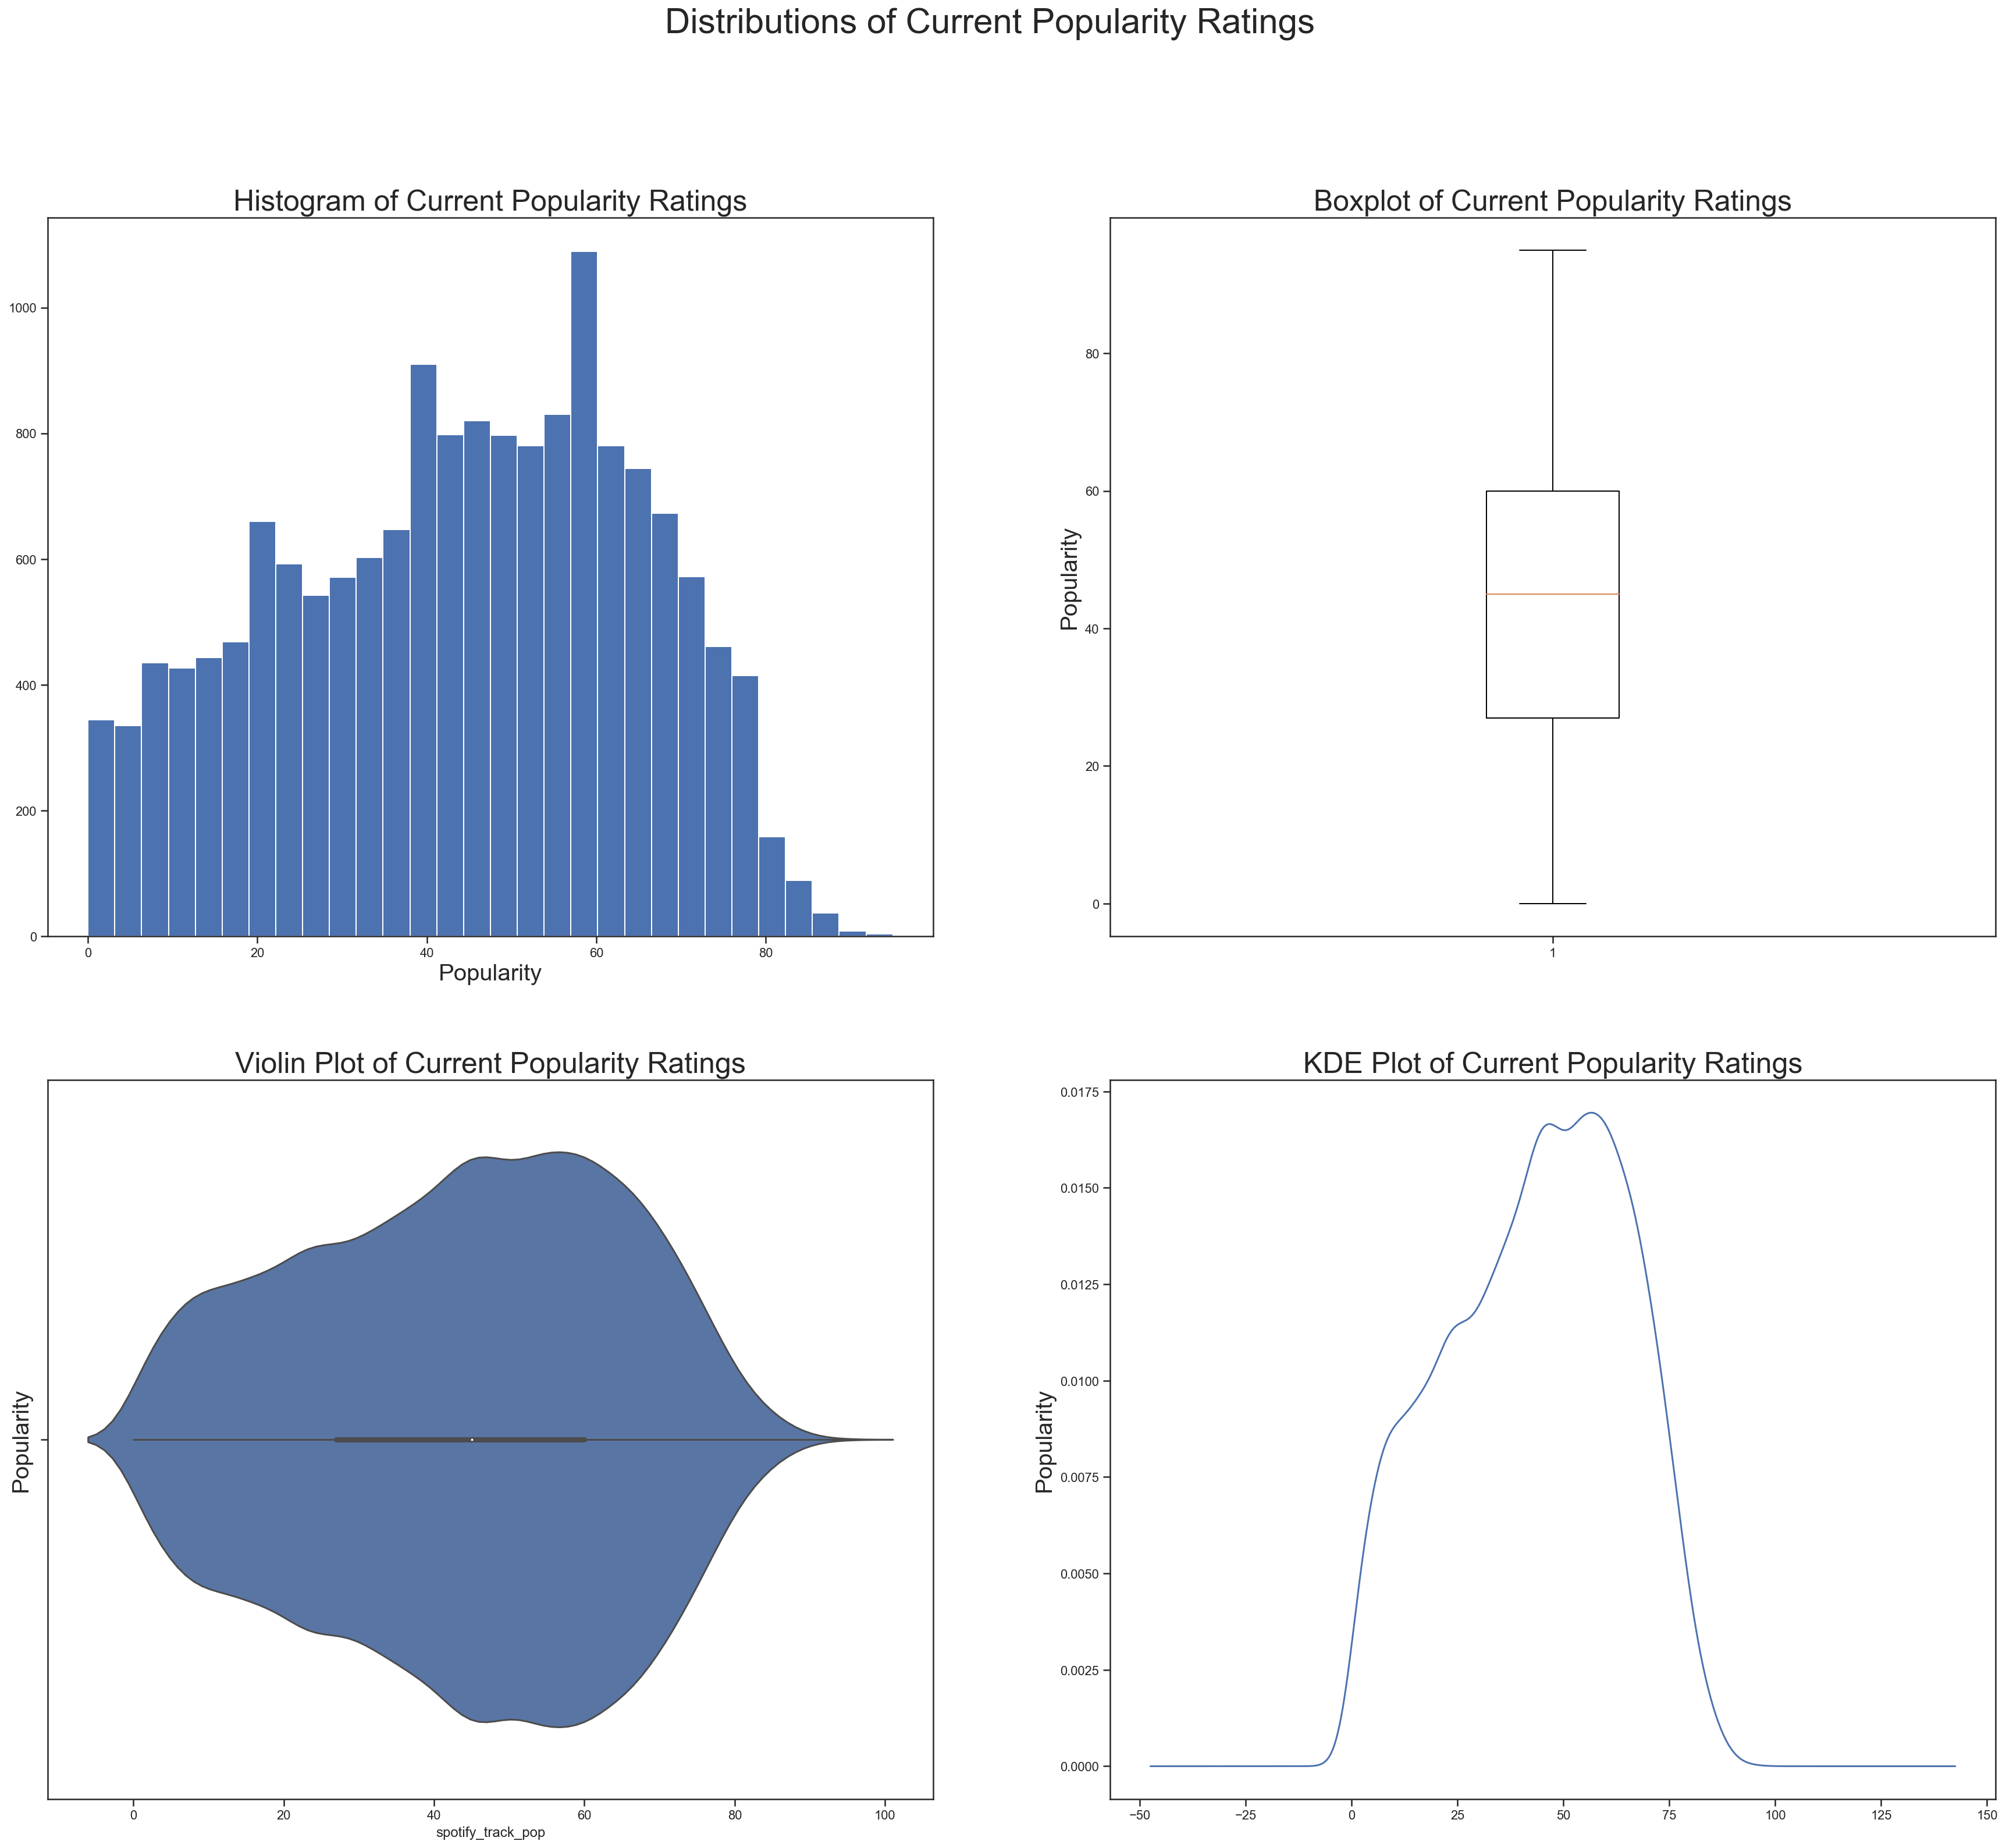

In [109]:
fig = plt.figure(figsize =(30,25))
ax1 = fig.add_subplot(2,2,1)
ax1.hist(just_one.spotify_track_pop, bins=30)
ax1.set_xlabel('Popularity',fontsize=20)
ax1.set_title('Histogram of Current Popularity Ratings',fontsize =25)
ax2 = fig.add_subplot(2,2,2)
ax2.set_ylabel('Popularity',fontsize=20)
ax2.boxplot(just_one.spotify_track_pop)
ax2.set_title('Boxplot of Current Popularity Ratings',fontsize =25)
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.violinplot(just_one.spotify_track_pop)
ax3.set_ylabel('Popularity',fontsize=20)
ax3.set_title('Violin Plot of Current Popularity Ratings',fontsize =25)
ax4 = fig.add_subplot(2,2,4)
ax4 = just_one.spotify_track_pop.plot(kind='kde')
ax4.set_title('KDE Plot of Current Popularity Ratings',fontsize =25)
ax4.set_ylabel('Popularity',fontsize=20)
fig.suptitle('Distributions of Current Popularity Ratings',fontsize =30);

#### spotify popularity (#1s)

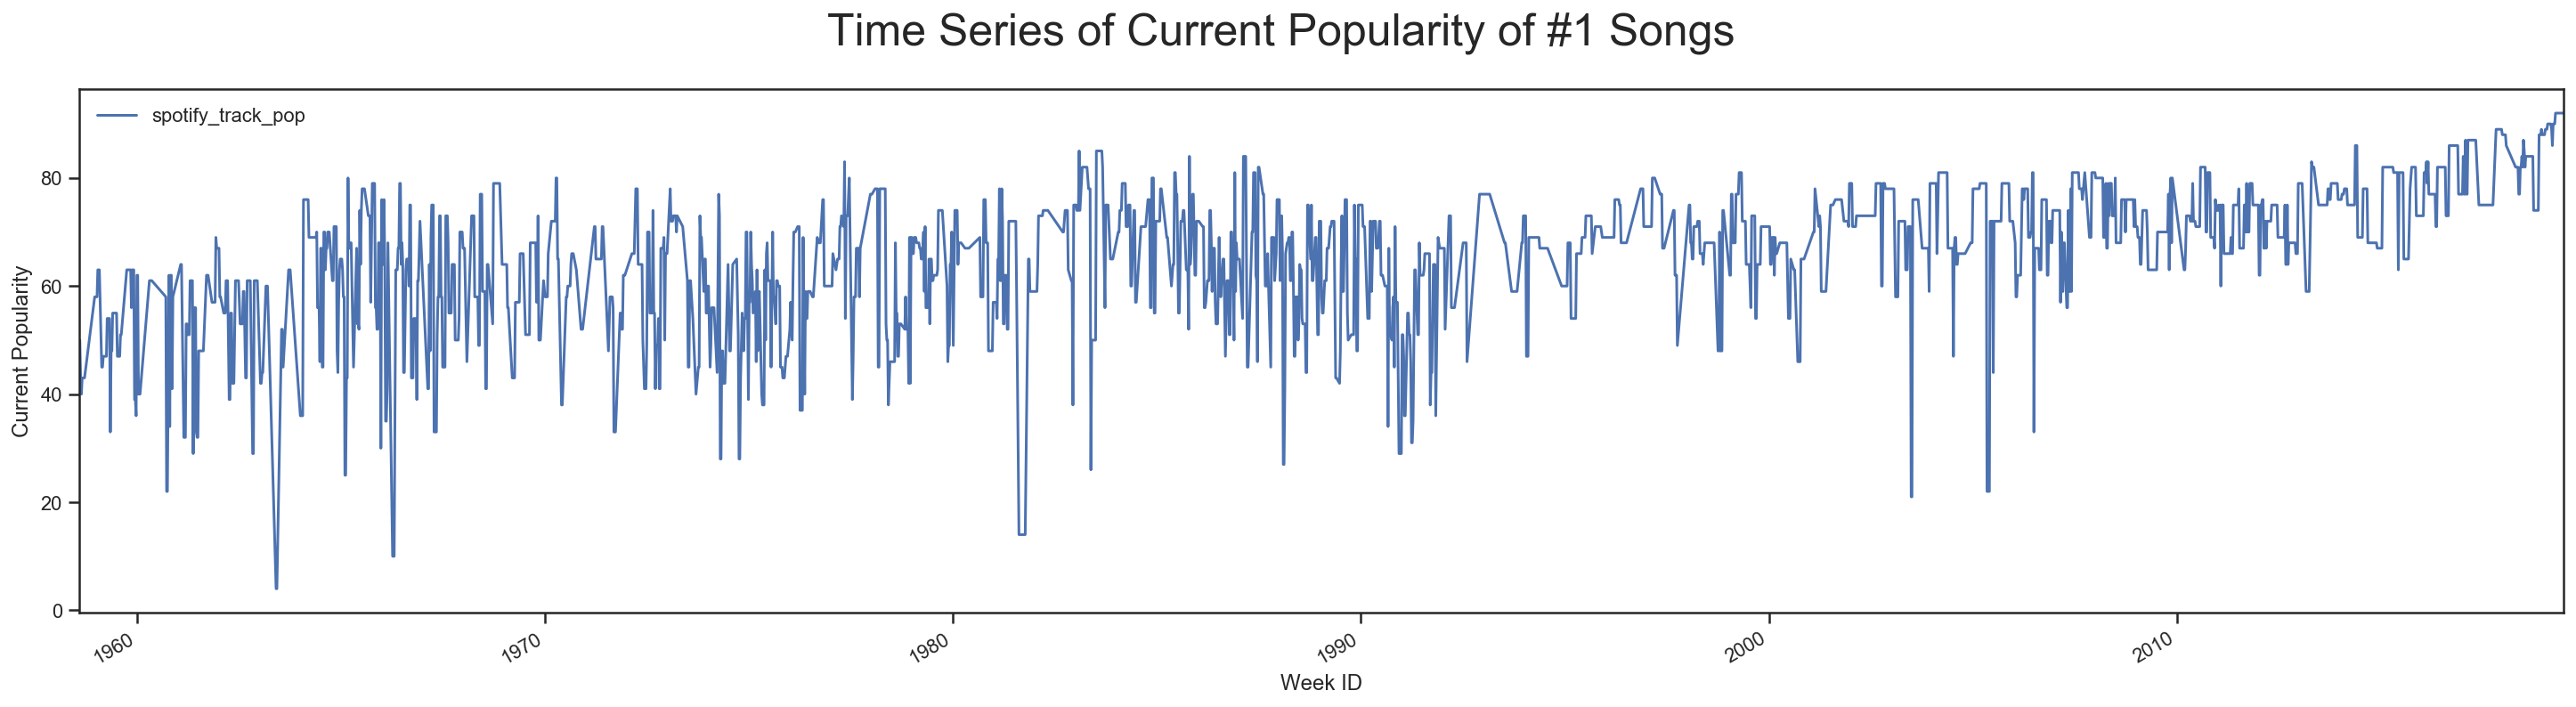

In [114]:
rank_1 = df[df['rank_'] == 1]
rank_1.plot(x='weekid',y='spotify_track_pop',figsize=(25,6))
plt.suptitle('Time Series of Current Popularity of #1 Songs',size =25)
plt.xlabel('Week ID');
plt.ylabel('Current Popularity');

The way in which Spotify make their popualrity metric is based on recent listens.

There is a steeper gradient from 2011; perhaps Spotify’s deal with Facebook to turn music into a social experience had a role to play. One could not argue that this gives an advantage to artists after this date as we can that track popularity ressembles a normal distribtion and therefore is normalized - it is not total plays.

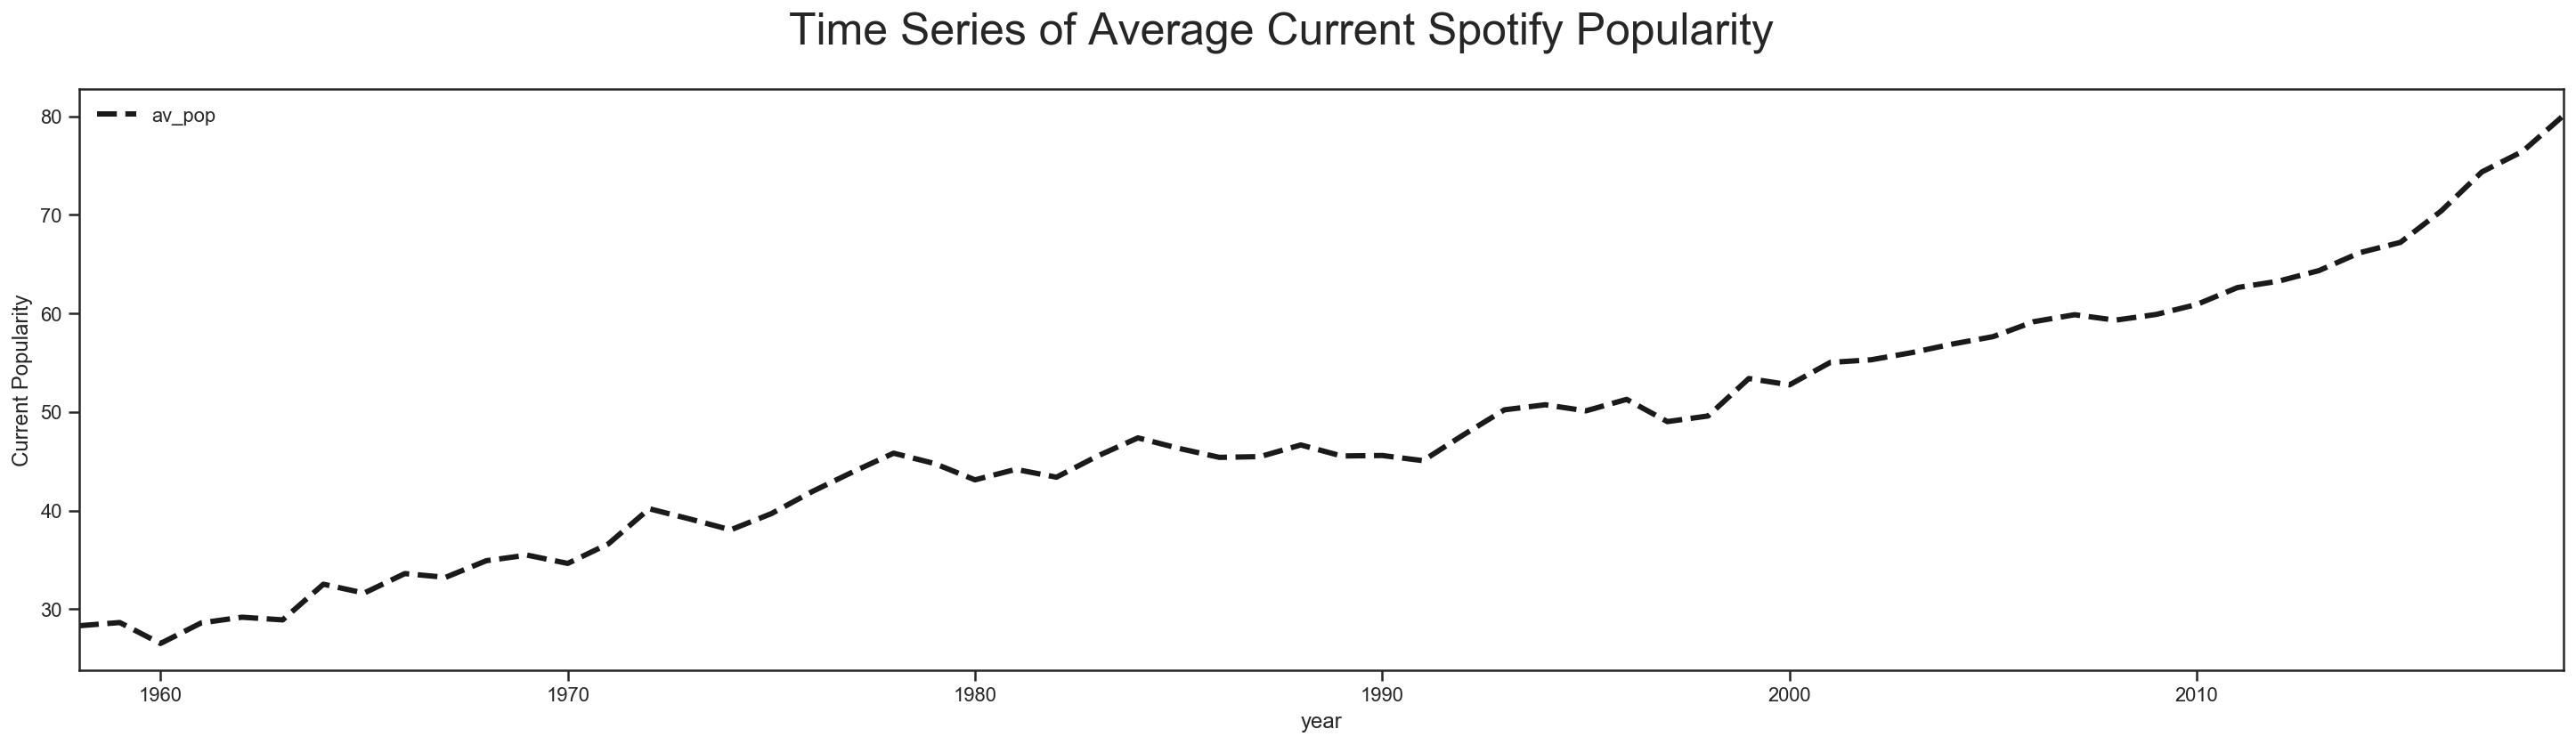

In [115]:
spot_av_pop = []
for year in  df.sort_values(by='year').year.unique():
    av_popular = df.groupby('year').get_group(year).spotify_track_pop.mean()
    spot_av_pop.append(av_popular) 
spot_av_pop_yearly = pd.DataFrame({'year': df.sort_values(by='year').year.unique(), 'av_pop':spot_av_pop })
spot_av_pop_yearly.plot(x='year',y='av_pop',figsize=(25,6), color='k', linestyle='dashed', linewidth = 3)
plt.suptitle('Time Series of Average Current Spotify Popularity',size =25)
plt.ylabel('Current Popularity');

#### ••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••

## Identify outliers

## boxplot of each musical component

In [1202]:
musical =just_one[['acousticness', 'danceability',
                'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
                'tempo', 'valence', 'genre']]

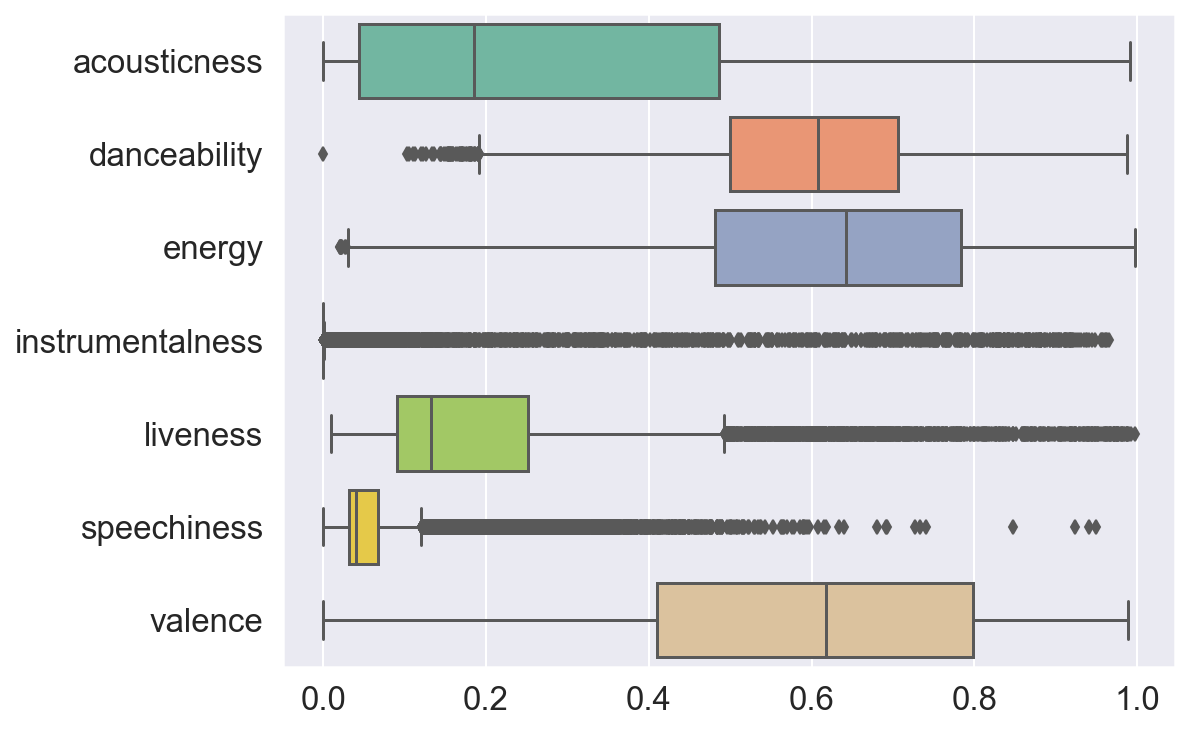

In [1203]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(data=musical.drop(['tempo', 'loudness'],axis=1), orient="h", palette="Set2")

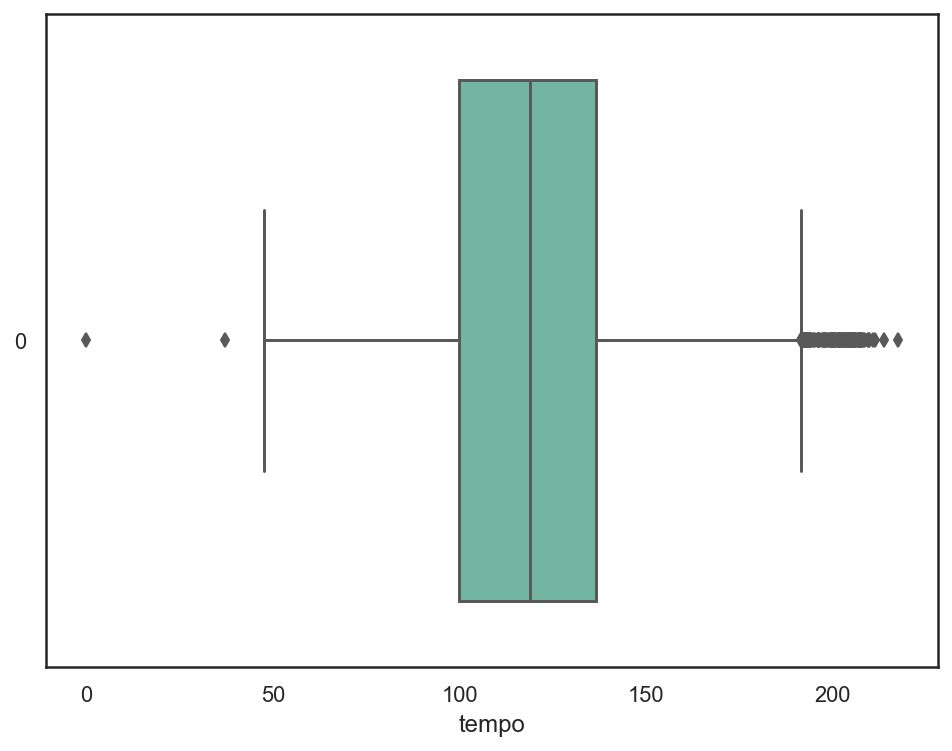

In [1221]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(data=musical['tempo'], orient="h", palette="Set2", color='olivedrab')
ax.set_xlabel('tempo');

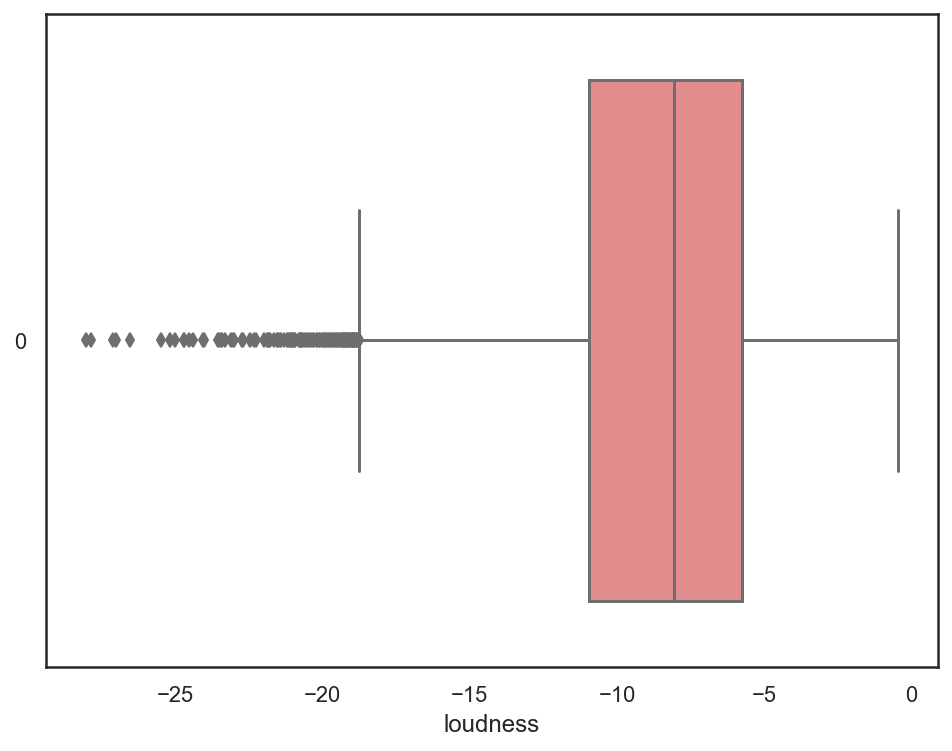

In [1223]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(data=musical['loudness'], orient="h", color='lightcoral')
ax.set_xlabel('loudness');

In [1251]:
just_one = just_one[just_one.danceability != 0]
just_one = just_one[just_one.tempo != 0]

#### popularity by genre

Once each song was categorized, we looked at how a genre's representation on the Hot 100 chart changed over time. To do so, we calculated the total number of Hot 100 spots occupied by each of our 16 major genres in a given year. Consider just 2016 for a second. Our dataset stretches through August 13, meaning that we have 33 Hot 100 charts for this year. Each chart has 100 spots. Thus, there have been 3,300 spots up for grabs so far in 2016. So what percentage of those 3,300 were nabbed by artists from each genre?

Performing the same calculation for each year since 1958, we produced this chart:

Text(0.5, 0, 'date')

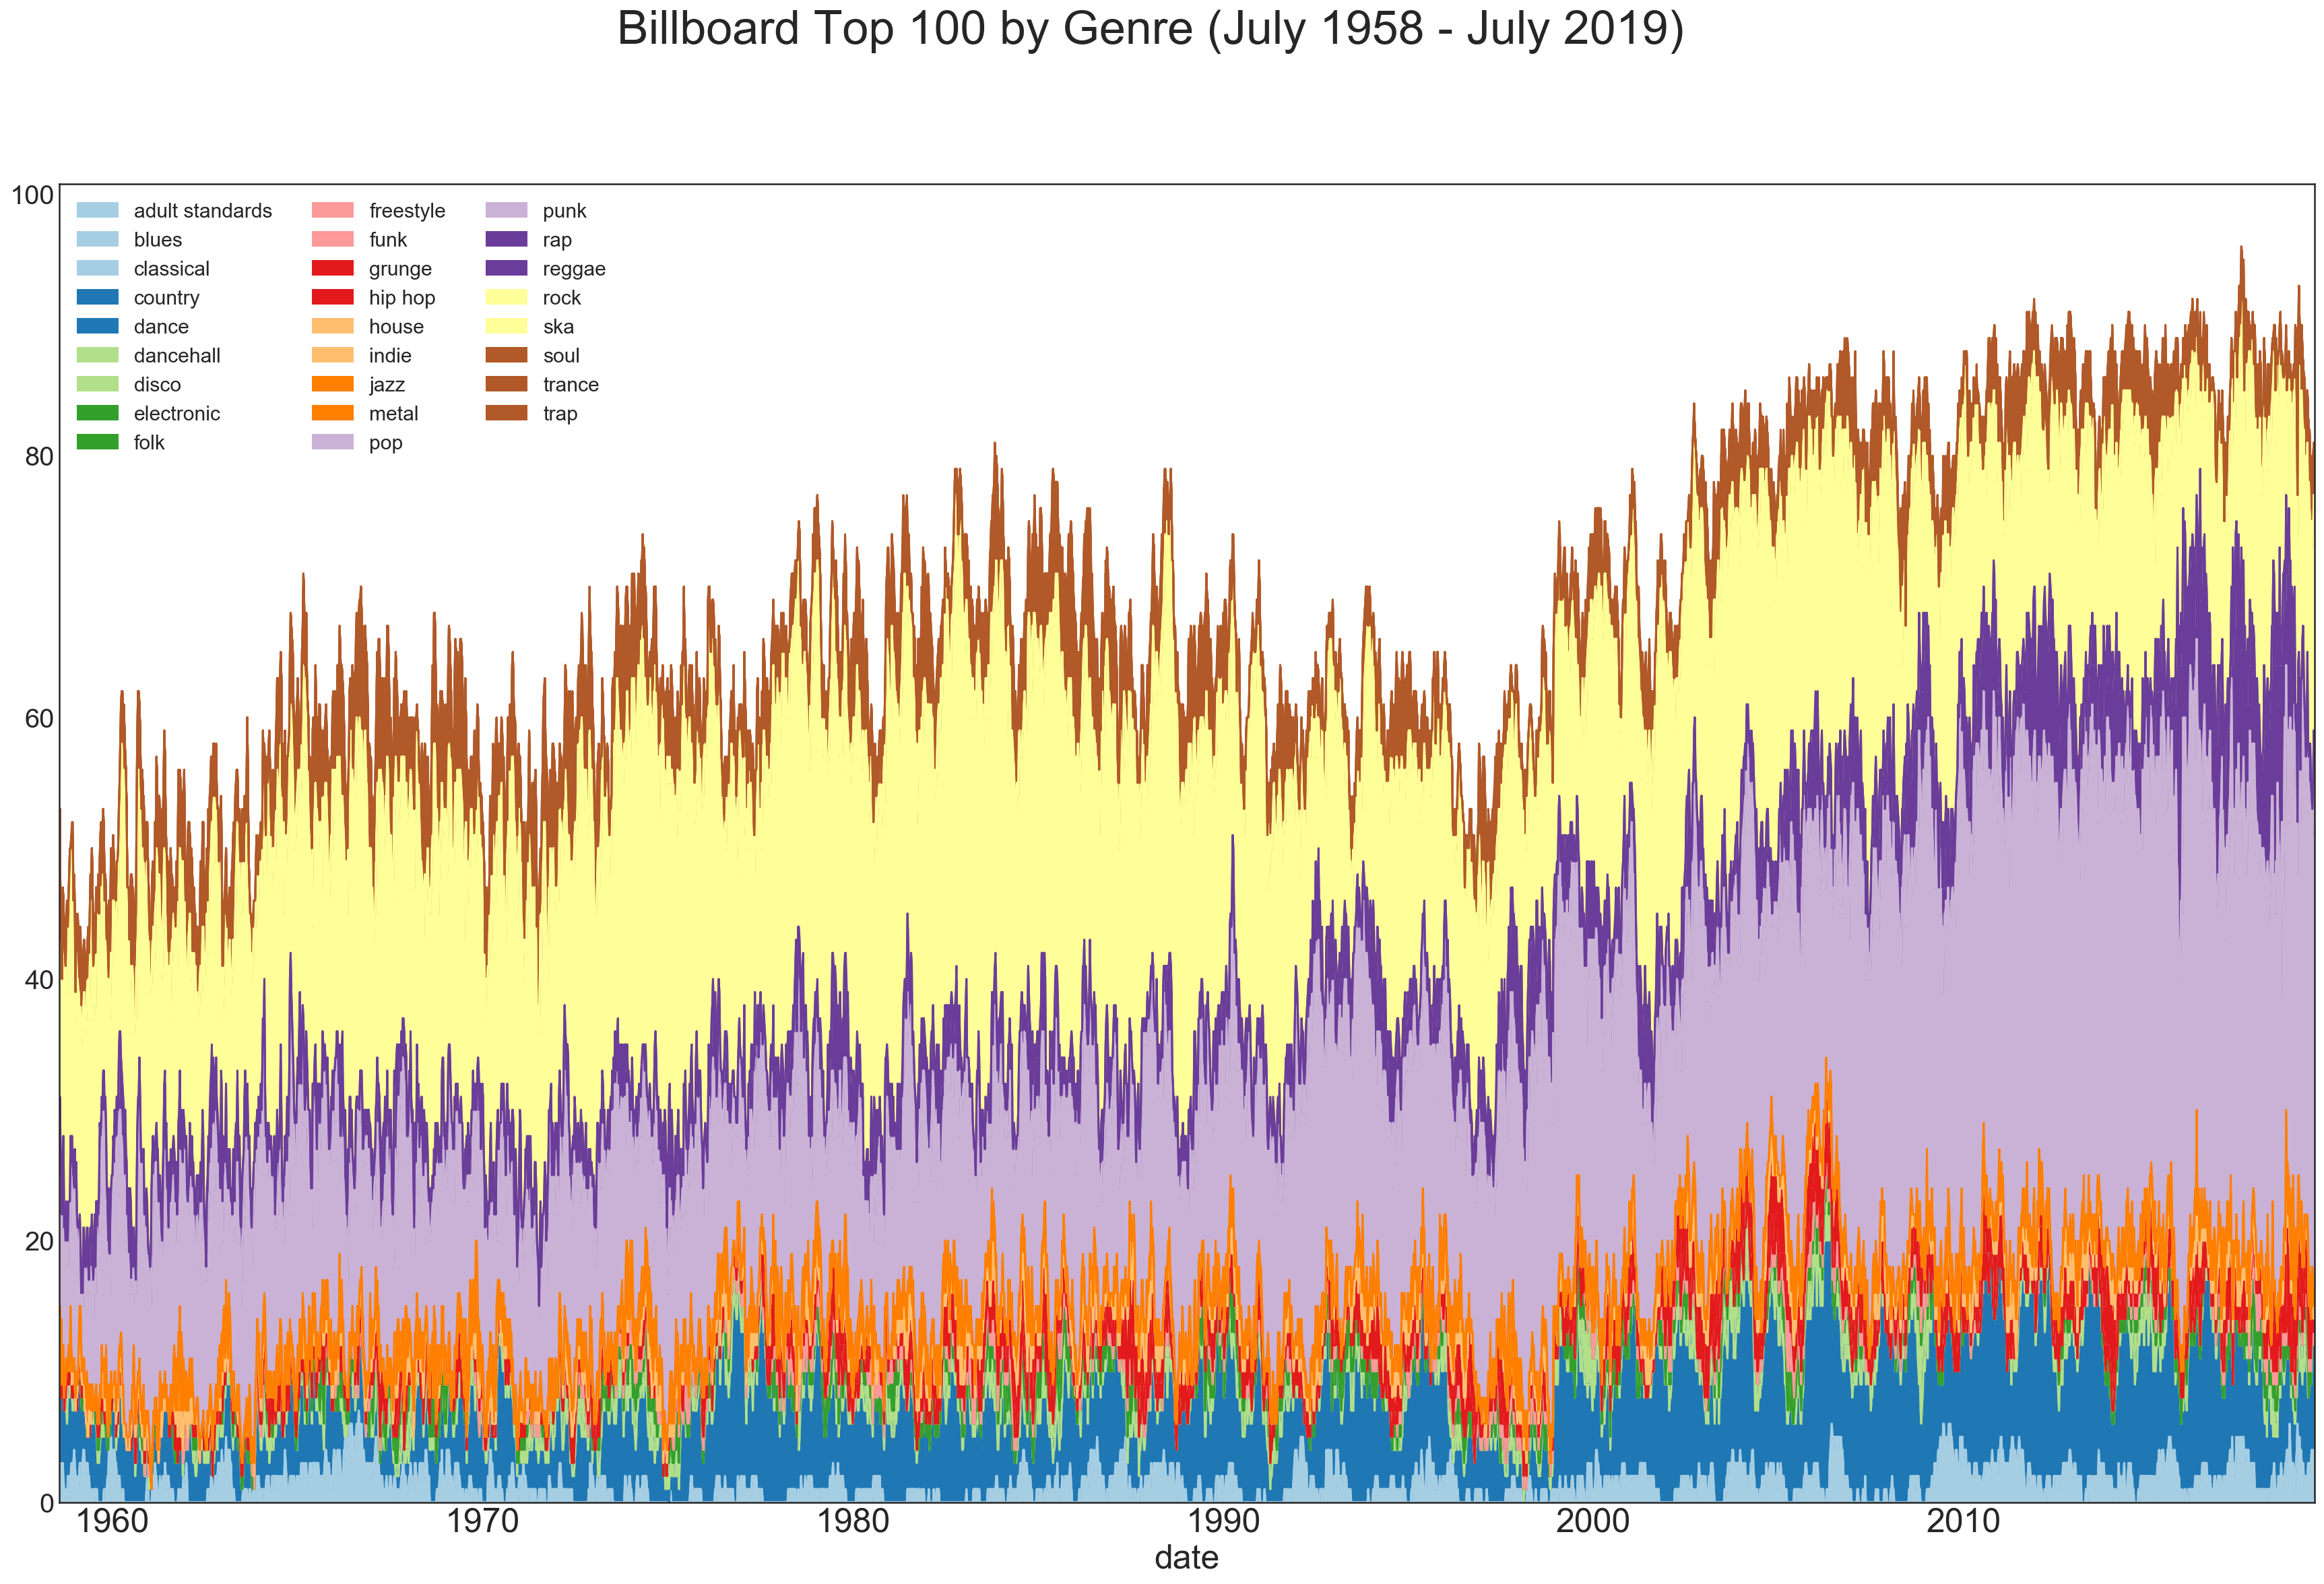

In [54]:
song_group.plot(kind='area',figsize=(30,18),colormap ='Paired')
plt.legend(loc=2,fontsize=15,ncol=3,markerscale=100)
plt.suptitle('Billboard Top 100 by Genre (July 1958 - July 2019)',fontsize=35)
plt.yticks(fontsize=20)
plt.xticks(fontsize=25)
plt.xlabel('date',fontsize=25)

The time series plot represents the evolution of genres in the Billboard Top 40 list over the past half century. As evident by the graph, rock music has dominated the list for most of its 54 years of existence. Starting in 1990, one can see that the genres in the Billboard Top 40 begin to diversify with the emergence of R&B, hip hop and rap. Today we see strong representation from country, rock, and even the resurgence of disco, a genre long left for dead at the beginning of the 1980s.



- Given the trajectories that various genres have followed, it's clear that there's no "one-size-fits-all" genre lifecycle. Here's a brief look at how a few music genres have evolved:

- Pop standards seem to have been the standard in the late '50s. The genre provided the largest percentage of Hot 100 entries for the first three years of the chart's existence. Given that we only have data stretching back to 1958, we probably haven't even captured the genre's peak years. 
- Rock and soul were the most popular music genres from the mid-60s to mid-70s. But as soul peaked in 1974 and slowly began to fade, rock continued to climb. Its run from 1982-86, when rock musicians occupied nearly 60% of available Hot 100 spots, is by far the most dominant stretch for any one genre.
- Despite all the attention paid to boy bands in the late '90s, it seems like R&B had no problem flourishing. Acts like Boyz II Men and Janet Jackson propelled the genre's popularity and ingratiated it with the masses.
- Country has had a tumultuous ride in the history of popular American music. It enjoyed middling popularity through the mid-'80s, when it all but dropped off the charts. Since 1999, however, it's seen a noticeable resurgence.
- Music trends have swung in favor of pop and hip-hop in the 2010s. Pop has owned the largest share of Billboard spots dating back to 2006, but has seen its popularity decline slightly since 2011. Meanwhile, rap has come on strong in the last two years. In fact, rap is on pace to occupy more than 30% of Hot 100 spots this year, higher than its previous peak in 2004.